In [1]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind") # Sorry ik ben kleurenblind dus ik moet speciale dingen hebben.

# Schroedinger met FDM

Zoals document al aangaf kan de Schroedingervergelijken numeriek opgelost worden door alles in een big ass tri-diagonale matrix te zetten en er een lineaire algebra opdracht van te maken.

$$
\begin{bmatrix}
\frac{1}{\Delta x'^2}+V'_1 & -\frac{1}{2 \Delta x'^2} &   0 & 0...\\
-\frac{1}{2 \Delta x'^2} & \frac{1}{\Delta x'^2}+V'_2 & -\frac{1}{2 \Delta y^2} & 0... \\
...& ... & ... & -\frac{1}{2 \Delta x^2}\\
...0 & 0 & -\frac{1}{2 \Delta x'^2} & \frac{1}{\Delta x'^2}+V'_{N-1}\\
\end{bmatrix} \cdot \begin{pmatrix}
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix} = E' \begin{pmatrix}
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix}
$$


Hier bij zijn: 

- $E' = \frac{m L^2}{\hbar^2} E$
- $V' = \frac{m L^2}{\hbar^2} V$
- $x' = \frac{x}{L}$

dimensieloze grootheden. Dit maakt echter voor het oplossen van $\psi$ niet uit, aangezien deze sowieso dimensieloos is.

Dus volgende dingen zijn nodig in python:

- een functie die het potentiaal definieerd.
- een functie die onze big ass lineaire algebra probleem oplost.

# Functie voor potentiaal

In [2]:
def V_p(x):

    # return np.zeros(len(x)) # Voor infinite square well

    return 100 * ((x<=0.25) + (x>=0.765)).astype(float) # Voor finite square well

# Functie voor het lineaire algebra probleem

de tridiagonale matrix bestaat uit:
- 1 hoofddiagonaal
- 2 gelijke nevendiagonalen

Gelukkig of `scipy` en functie om eigenwaarde problemen van tridiagonale matrices op te lossen, dus gebruik ik die lekker. Dus het stappenplan wordt:

1. definieer de hoofdiagonaal
2. definieer de nevendiagonaal (deze hoeft maar 1 keer gedefinieerd te worden want de de nevendiagonalen moeten altijd gelijk zijn bij een tridiagonale matrix)
3. voer de diagonalen aan de eigenwaarden functie van `scipy` en let de magic happen
    - de `eigenh_tridiagonal` functie van `scipy` geeft de eigenwaarden en eigenvectoren uit in volgorde: eigenwaarden, eigenvectoren

In [3]:
def Schroedinger(x, dx):

    main = 1/(dx**2) + V_p(x)[1:-1]
    off = -1/(2*dx**2) * np.ones(len(main)-1) # lengte van de nevendiagonalen = lengte van hoofd - 1

    E, psi = eigh_tridiagonal(main, off) # psi word uitgegeven als een matrix waarbij elke kolomn een eigenvector is.

    return E, psi.T # psi wordt dmv psi.T getransponeerd, zodat elke vector 1 rij wordt.
                    # dit hoef je niet te doen maar ik vind het makkelijker met de syntex voor het plotten

# Berekening van eigenvectoren

Nu de functies al geschreven zijn is het makkelijk om de eigenwaarden en eigenvectoren te berekenen. Het enige wat moet gebeuren is dat $x$ en $dx$ gedefinieerd worden (dimensieloos), en dan worden ze aan de functie `Schroedinger` gevoerd.

Vergeet niet dat de randvoorwaarde voor $\psi$

$$\psi(0) = \psi(1) = 0$$

In [4]:
# Variabelen
N = 1000    # aantal gridpoints
dx = 1/N    # spacing van gridpoints
x = np.linspace(0, 1, N+1)

In [5]:
E, psi = Schroedinger(x, dx)

# Controle of $\psi$ genormaliseerd is

er kan getest worden op de normaliteit van $\psi$ door het inproduct te nemen, hierbij geld

$$\psi_i \cdot \psi_j = \delta_{ij}$$

inproduct kan in python met @.

In [6]:
psi[0]@psi[0] # bijna 1

1.0000000000000018

In [7]:
psi[0]@psi[1] # bijna 0

7.703073578963298e-16

Nu de functie gerund heeft kunnen we kijken naar de eerste 3 energieniveaus

In [8]:
E[0:5]

array([ 11.40324528,  44.30456124,  93.0160323 , 141.55060683,
       178.50599902])

Deze zijn dimensieloos, dus om de daadwerkelijke energie te krijgen:

$$ E = \frac{\hbar^2 E'}{m L^2} $$

maar dat doe ik niet want geeft weinig toegevoegde waarde. Je kan ook namelijk dimensieloos plotten.

# plotten van eerste 4 golffuncties

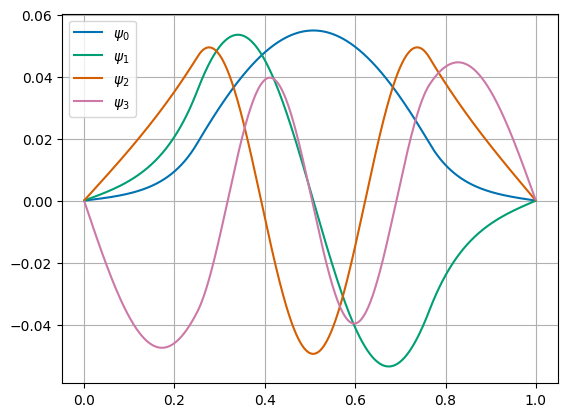

In [9]:
fig, ax = plt.subplots(1,1)
ax.grid(True)

for i in range(0,4):
    ax.plot(x[1:-1], psi[i], label=("$\psi_{%i}$" %i))

ax.legend()
plt.show()

# Eerste vier waarschijnlijkheden

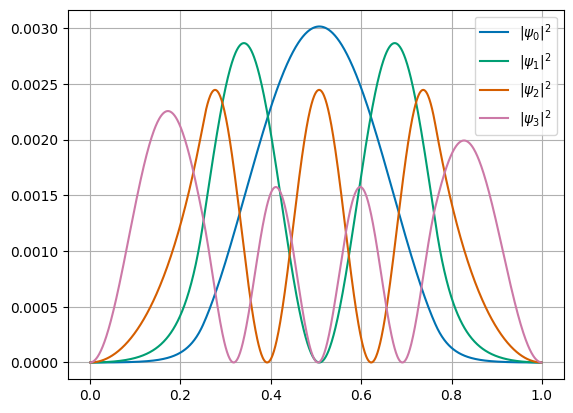

In [10]:
fig, ax = plt.subplots(1,1)
ax.grid(True)

for i in range(0,4):
    ax.plot(x[1:-1], np.abs(psi[i])**2, label=(r"$\left|\psi_{%i}\right|^2$" %i))

ax.legend(loc='upper right')
plt.show()

# Energieniveaus plotten

Text(0.5, 0, '$n$')

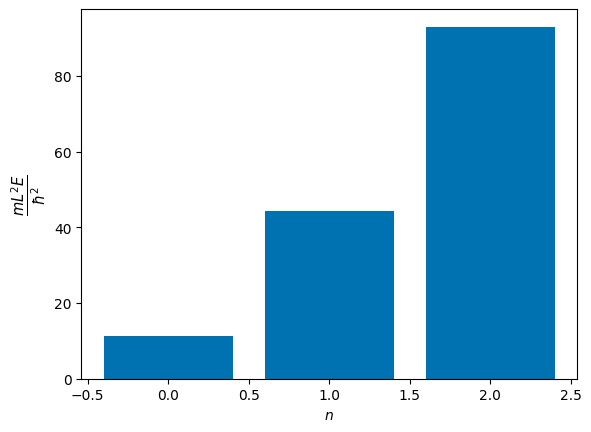

In [11]:
fig, ax = plt.subplots(1,1)

ax.bar(np.arange(0, 3), E[:3])
ax.set_ylabel(r"$\frac{m L^2 E}{\hbar^2}$", fontsize=15)
ax.set_xlabel(r"$n$")